## 1.Importing the libraries.

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Sklearn version:", sklearn.__version__)

Numpy version: 1.25.2
Pandas version: 2.0.3
Sklearn version: 1.3.0


In [2]:
# df = pd.read_csv('spam.csv')

### UnicodeDecodeError: 'utf-8' Codec Can't Decode Bytes

This error occurs when the `read_csv` function in pandas tries to read a file encoded in a format other than UTF-8, but the default encoding is set to UTF-8. The error indicates that the file contains invalid byte sequences for UTF-8.

#### Fix:
The issue was resolved by specifying the correct encoding format (e.g., `encoding='cp1252'`) while reading the file using `pd.read_csv`. This ensures that the file is read with the appropriate encoding, avoiding decoding errors.

###  Short Summary of Encoding in CSV Files:

* **Encoding** = how text is stored as bytes (e.g., `A`, `₹`, `你` → binary).
* **UTF-8** is the **default in pandas** because it:
    * Supports all languages (universal),
    * Is efficient for English,
    * Is widely used on the web.
* If your file is from **Excel/Windows**, it might use `cp1252` or `ISO-8859-1`.
* Use `encoding="cp1252"` if `utf-8` gives errors like `UnicodeDecodeError`.

### 🔧 Use chardet to auto-detect encoding:


In [3]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # read first 10k bytes
    print(result)


{'encoding': 'Windows-1252', 'confidence': 0.7261670208776098, 'language': ''}


In [5]:
df = pd.read_csv('spam.csv', encoding='cp1252')


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

## Steps to Follow in Our Project

1. **Data Cleaning**  
    - Handle missing values.
    - Remove unnecessary columns.
    - Rename columns for better understanding.
    - Remove duplicate entries.

2. **Exploratory Data Analysis (EDA)**  
    - Analyze the distribution of target labels.
    - Make new feature
    - Visualize data using plots (e.g., histograms, pie charts).
    - Identify patterns and correlations in the data.

3. **Text Preprocessing**  
    - Convert text to lowercase.
    - Tokenize the text into words.
    - Remove special characters, stopwords, and punctuation.
    - Perform stemming to reduce words to their root form.

4. **Model Building**  
    - Split the data into training and testing sets.
    - Choose appropriate machine learning algorithms.
    - Train the model on the preprocessed data.

5. **Model Evaluation**  
    - Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.
    - Analyze confusion matrix for detailed insights.

6. **Improvements**  
    - Optimize the model by tuning hyperparameters.
    - Experiment with different algorithms or feature engineering techniques.

7. **Website**  
    - Develop a user-friendly interface for the project.
    - Allow users to input text and get predictions.

8. **Deployment**  
    - Deploy the model and website on a cloud platform.
    - Ensure the application is accessible and scalable.

## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Drop last three columns as most of the entries in it are null values

In [9]:

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
df.sample(5)

,v1,v2
2475,ham,Mm i am on the way to railway
1331,ham,Good Morning plz call me sir
2440,ham,"Great. I'm in church now, will holla when i ge..."
3367,ham,"Hey elaine, is today's meeting still on?"
2645,ham,"Sorry, I'll call later"


### Renaming the columns for better understanding

In [11]:
#renaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Label Encoding

We want to convert the `target` column into 0 and 1 for easier processing in machine learning models.

In [12]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:

encoder.fit(df['target'])           # Step 1: Fit
df['target'] = encoder.transform(df['target'])  # Step 2: Transform


### Checking for null values.

In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

### Cheking for duplicate values.

In [15]:
#check for duplicate values
df.duplicated().sum()

403

### Removing Duplicate Values
The `drop_duplicates` method removes duplicate rows from the dataset, keeping only the first occurrence. The `duplicated().sum()` confirms that no duplicate rows remain.

In [16]:
#remove duplicate values
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

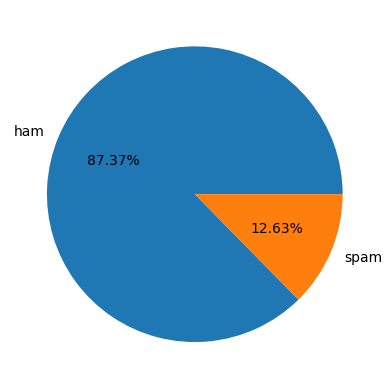

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%')
plt.show()

In [21]:
#data is imbalanced
import nltk


The `nltk.download('punkt')` command is used to download the Punkt tokenizer models from the NLTK library. These models are essential for tokenizing text into sentences or words, enabling tasks like splitting text into smaller components for natural language processing.

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Counting the Number of Characters

The line `df['num_characters'] = df['text'].apply(len)` adds a new column `num_characters` to the DataFrame. This column contains the total number of characters in each text message, calculated using the `len()` function. It helps in analyzing the length of messages for further insights or feature engineering.

In [23]:
df['num_characters'] = df['text'].apply(len) # counting the number of characters

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Adding num_words which have count of words in text .

In [25]:
#num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['text'].apply(lambda x: (nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

similarly adding number of senetences.

In [28]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham
df[df['target'] ==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target'] ==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


we can notice that mena of num_characters , num_words ,num_seneteces are higher in spam than ham.

In [33]:
#histogram plotting
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

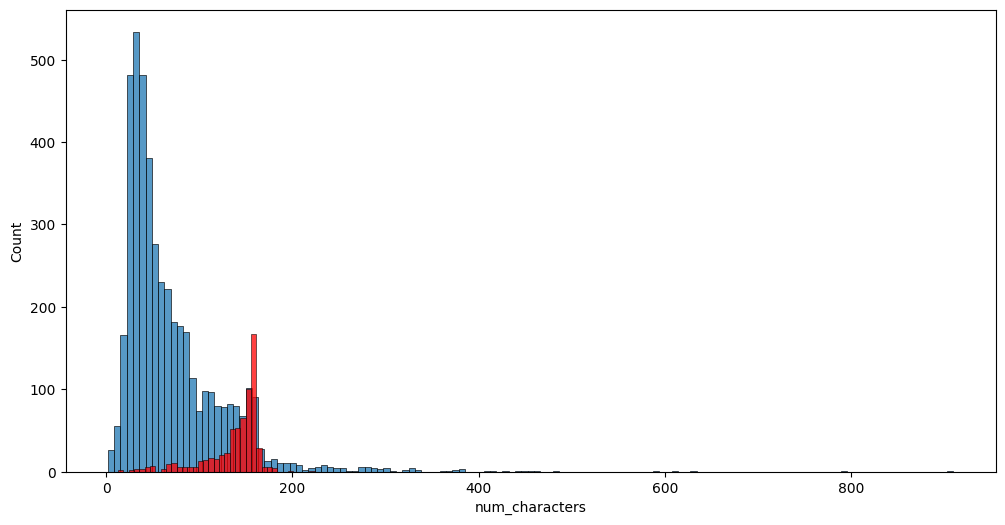

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

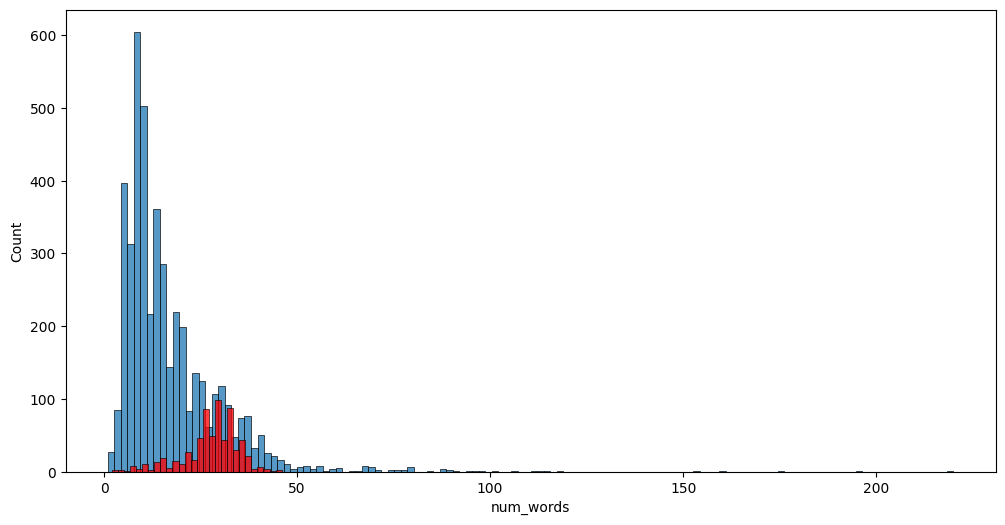

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

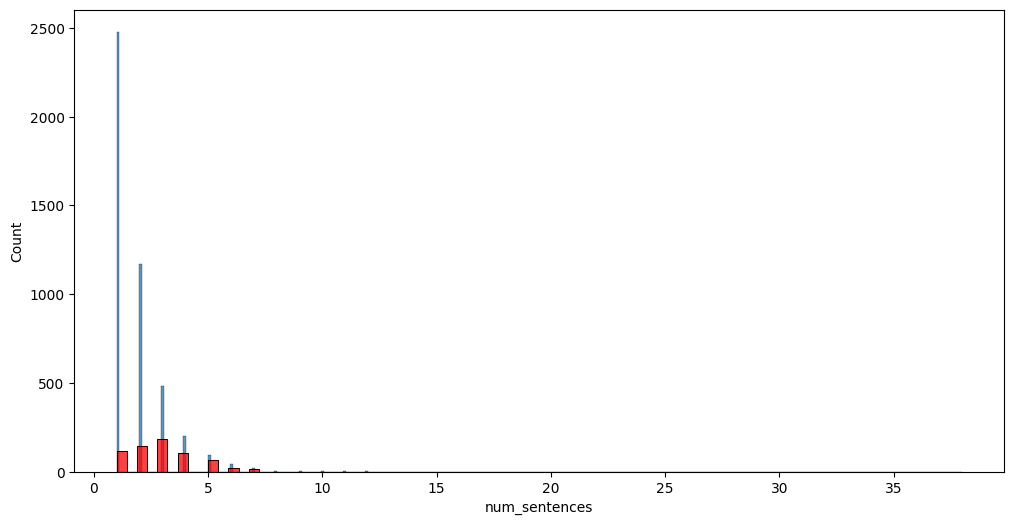

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


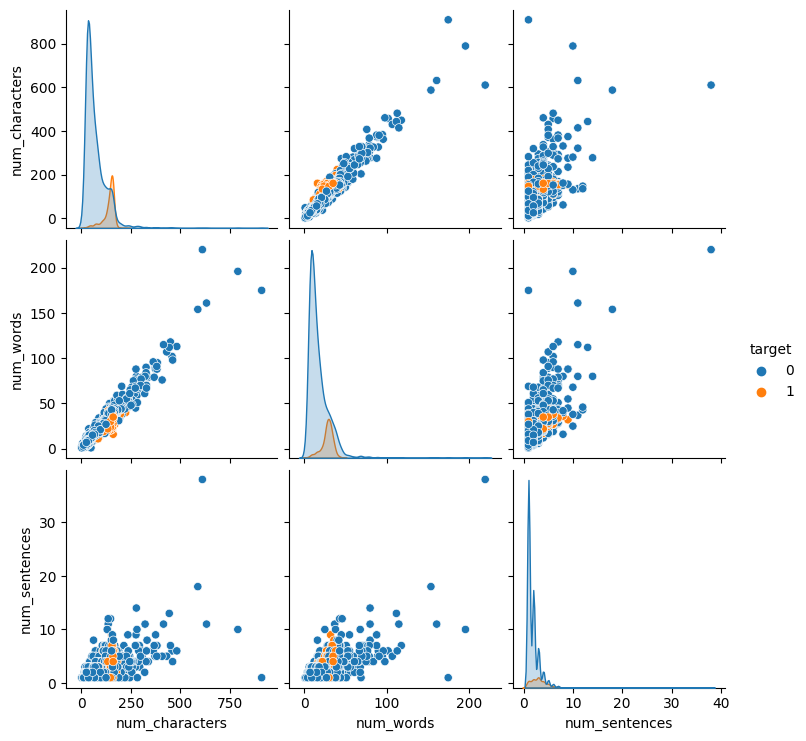

In [37]:
sns.pairplot(df,hue='target')

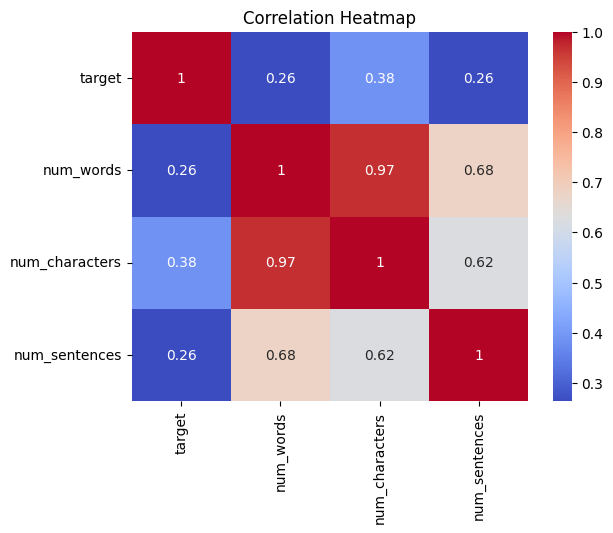

In [38]:
# Select the columns
value = df[['target', 'num_words', 'num_characters', 'num_sentences']]

# Draw heatmap
sns.heatmap(value.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Feature Selection: Choosing `num_characters`

Since there is a high correlation between `num_words`, `num_characters`, and `num_sentences`, we will select only one feature to avoid redundancy. We choose `num_characters` as it effectively represents the length of the text and provides sufficient information for analysis.

## 3. Data Preprocessing

Text preprocessing is a crucial step in preparing textual data for analysis or modeling. The following steps are performed as part of the preprocessing pipeline:

1. **Lowercase Conversion**  
    Convert all text to lowercase to ensure uniformity and avoid case-sensitive mismatches.

2. **Tokenization**  
    Split the text into individual words or tokens for easier analysis.

3. **Removing Special Characters**  
    Eliminate non-alphanumeric characters (e.g., punctuation, symbols) to clean the text.

4. **Removing Stopwords and Punctuation**  
    Remove commonly used words (e.g., "is", "the", "and") and punctuation that do not contribute significant meaning to the text.

5. **Stemming**  
    Reduce words to their root form (e.g., "running" becomes "run") to normalize variations of the same word.

These steps help in cleaning the data and preparing it for further analysis or machine learning tasks.

### 1.Lower Case Convrsion

In [39]:
def transform_text(text):
    text = text.lower()  # lower case
    return text

In [40]:
transform_text("HI how are YOU")

'hi how are you'

### 2. Tokenization

In [41]:
def transform_text(text):
    text = text.lower()  # lower case
    text = nltk.word_tokenize(text)  # tokenization
    return text

In [42]:
transform_text("HI how are YOU")

['hi', 'how', 'are', 'you']

### 3. Removing special characters

In [43]:
def transform_text(text):
    text = text.lower()  # lower case
    text = nltk.word_tokenize(text)  # tokenization

    y=[]
    for i in text:
        if i.isalnum(): #alphanumeric  alphabets and numeric (i.e a to z , A to Z, 0 to 9)
            y.append(i)
    return y

In [44]:
transform_text("hi how are you % shiva $ shukl")

['hi', 'how', 'are', 'you', 'shiva', 'shukl']

### 4. Removing Stopwords and Puctuations

**What are Stopwords?**  
Stopwords are commonly used words in a language such as "is", "the", "and", "in", etc., which do not carry significant meaning or contribute to the context of the text. These words are often used for grammatical structure but do not add much value to the analysis of the text.

**Why Remove Stopwords?**  
In text preprocessing, removing stopwords helps in reducing the noise in the data and focusing on the words that are more meaningful and relevant for tasks like text classification, sentiment analysis, or any other natural language processing (NLP) task. By eliminating stopwords, we can:  
- Reduce the size of the dataset, making computations faster.  
- Improve the performance of machine learning models by focusing on important words.  
- Enhance the quality of features extracted from the text.  

In this notebook, we are removing stopwords as part of the text preprocessing pipeline to clean the data and prepare it for further analysis or modeling.

In [45]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Why Remove String Punctuation?

**What is String Punctuation?**  
String punctuation refers to special characters such as `!`, `?`, `.`, `,`, `;`, `:`, `@`, `#`, etc., that are used in text to convey structure, tone, or emphasis.

**Why Remove Punctuation?**  
In text preprocessing, punctuation is often removed because it does not contribute meaningful information for tasks like text classification, sentiment analysis, or other natural language processing (NLP) tasks. Removing punctuation helps to:  
- Simplify the text and reduce noise.  
- Focus on the actual words or tokens that carry semantic meaning.  
- Improve the quality of features extracted from the text for machine learning models.  

By eliminating punctuation, we ensure that the analysis is not affected by irrelevant symbols, leading to cleaner and more consistent data.

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def transform_text(text):
    text = text.lower()  # lower case
    text = nltk.word_tokenize(text)  # tokenization

    y=[]
    for i in text:
        if i.isalnum(): #alphanumeric
            y.append(i)

    text =y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [48]:
transform_text("Hi how are you Shivam?")

['hi', 'shivam']

In [49]:
transform_text("Did you like my Presentatoin on ML?")

['like', 'presentatoin', 'ml']

### 5. Stemming

### What is Stemming?

**Stemming** is the process of reducing words to their root or base form by removing suffixes or prefixes. For example, words like "running", "runner", and "ran" are reduced to their root form "run".

### Why Do We Perform Stemming?

Stemming is performed to normalize words with similar meanings into a single representation, which helps in:
- **Reducing Dimensionality**: It decreases the number of unique words in the dataset.
- **Improving Model Performance**: By treating variations of a word as the same, it enhances the consistency of features for machine learning models.
- **Simplifying Text Analysis**: It makes text processing tasks like classification or clustering more efficient by focusing on the core meaning of words.

In [50]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [51]:
def transform_text(text):
    text = text.lower()  # lower case
    text = nltk.word_tokenize(text)  # tokenization

    y=[]
    for i in text:
        if i.isalnum(): #alphanumeric
            y.append(i)

    text =y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

The `transform_text` function performs text preprocessing in several steps:

1. **Lowercase Conversion**: Converts the input text to lowercase to ensure uniformity.
2. **Tokenization**: Splits the text into individual words (tokens) using `nltk.word_tokenize`.
3. **Removing Non-Alphanumeric Characters**: Filters out tokens that are not alphanumeric.
4. **Removing Stopwords and Punctuation**: Removes common stopwords (e.g., "is", "the") and punctuation using NLTK's stopwords list and `string.punctuation`.
5. **Stemming**: Reduces each word to its root form using the `PorterStemmer`.
6. **Joining Tokens**: Joins the processed tokens back into a single string with spaces.

This function cleans and normalizes the text, preparing it for tasks like text analysis or machine learning.

In [52]:
transform_text("I loved the YT lectures on Machine Learning.How about you?")

'love yt lectur machin'

In [53]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
df['transformed_text'] = df['text'].apply(transform_text)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\users\shiva\appdata\local\programs\python\python311\lib\site-packages (1.9.4)




[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500 , min_font_size = 10 , background_color = 'white')

### Spam Word Cloud

Visualizing the most frequent words in spam messages using the `WordCloud` library. Larger words indicate higher frequency.


In [59]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

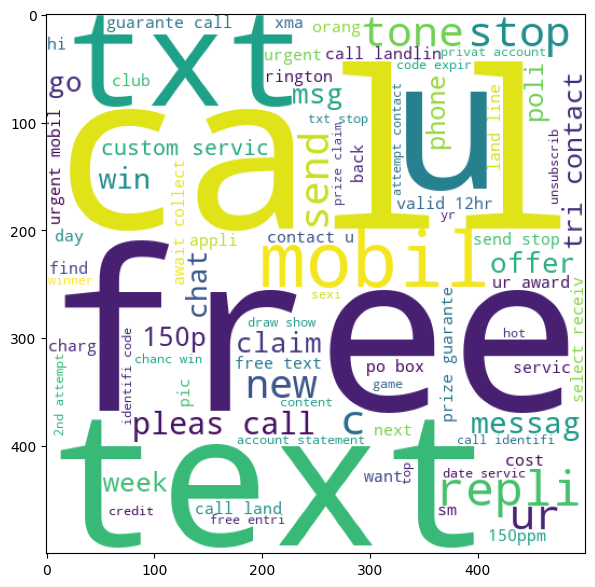

In [60]:
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)

### Ham Word Cloud

Visualizing the most frequent words in ham messages using the `WordCloud` library. Larger words indicate higher frequency.

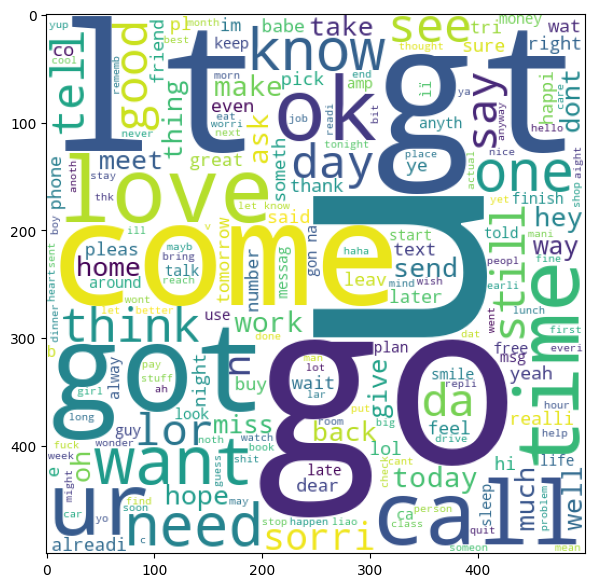

In [61]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,7))
plt.imshow(ham_wc)

In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [64]:
len(spam_corpus)

9939

In [65]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

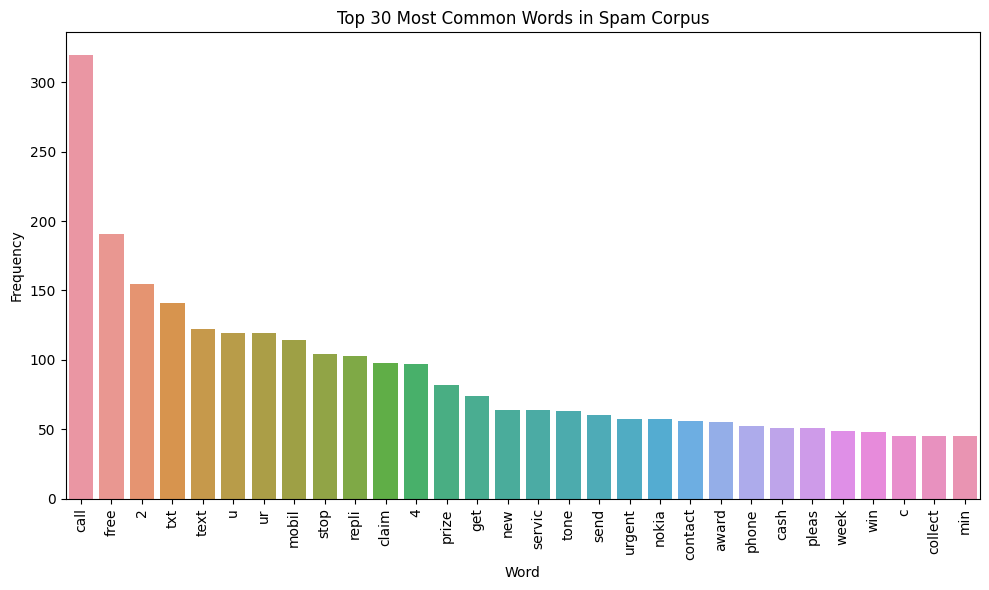

In [66]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count word frequencies
word_freq = Counter(spam_corpus)

# Convert to DataFrame
common_words_df = pd.DataFrame(word_freq.most_common(30), columns=['Word', 'Frequency'])

# Plot using seaborn
plt.figure(figsize=(10, 6))  # Optional: improve size
sns.barplot(x='Word', y='Frequency', data=common_words_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.tight_layout()
plt.show()


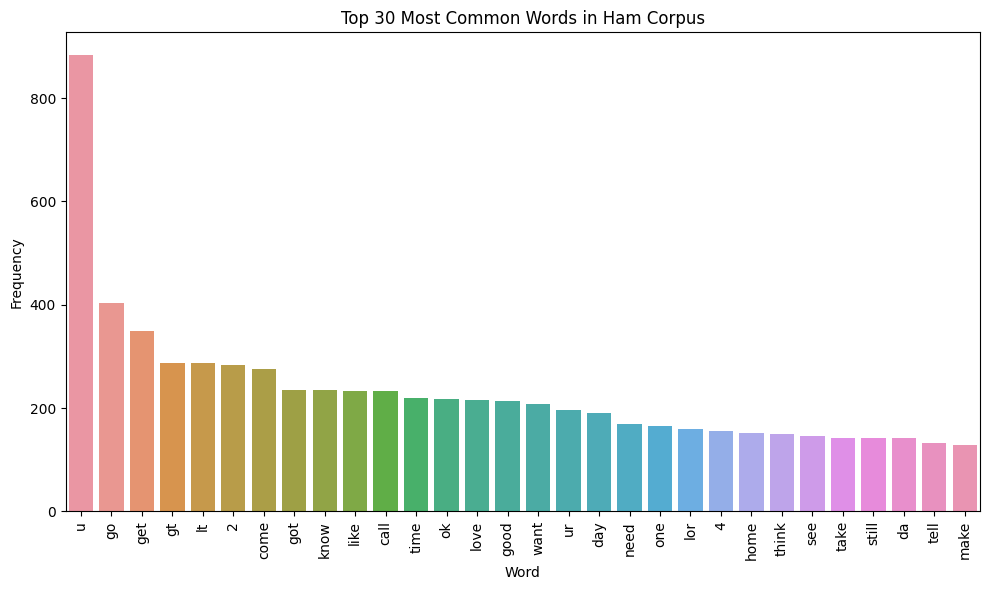

In [67]:

# Count word frequencies in ham_corpus
ham_word_freq = Counter(ham_corpus)

# Convert to DataFrame
ham_common_words_df = pd.DataFrame(ham_word_freq.most_common(30), columns=['Word', 'Frequency'])

# Plot using seaborn
plt.figure(figsize=(10, 6))  # Optional: adjust figure size
sns.barplot(x='Word', y='Frequency', data=ham_common_words_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.tight_layout()
plt.show()


# 4. Model Building


### CountVectorizer and TfidfVectorizer

- **CountVectorizer**: Converts text data into a matrix of token counts, representing the frequency of each word in the text.
- **TfidfVectorizer**: Converts text data into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) scores, emphasizing important words while reducing the weight of frequently occurring but less meaningful words.

`TfidfVectorizer(max_features=3000)` limits the vocabulary to the top 3000 most frequent words.

In [110]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

### Transforming Text Data

The `tfidf.fit_transform(df['transformed_text']).toarray()` converts the preprocessed text into a numerical matrix using TF-IDF, suitable for machine learning models.

In [111]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [113]:
X.shape

(5169, 3000)

In [114]:
y=df['target'].values

In [115]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Splitting the Data

The dataset is split into training and testing sets using an 80-20 ratio.

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

### Importing Naive Bayes Models and Metrics

- **GaussianNB, MultinomialNB, BernoulliNB**: Different variants of Naive Bayes classifiers.
- **Metrics**: Accuracy, confusion matrix, and precision score for model evaluation.

In [118]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [119]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [120]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [121]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [122]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Model Evaluation and Selection

After evaluating the three Naive Bayes models (GaussianNB, MultinomialNB, and BernoulliNB), the following results were observed:

- **MultinomialNB** achieved the highest precision score of **1.0**, making it the best-performing model for this dataset.
- **GaussianNB** and **BernoulliNB** had lower precision scores compared to MultinomialNB.

Thus, **MultinomialNB** is selected as the final model for this task.

In [124]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Machine Learning Models

Various machine learning models, including Logistic Regression, SVM, Naive Bayes, Decision Trees, KNN, and ensemble methods like Random Forest, AdaBoost, Bagging, ExtraTrees, Gradient Boosting, and XGBoost, are imported for classification tasks.

In [82]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Initializing Machine Learning Models

Various classifiers such as SVC, KNN, MultinomialNB, Decision Tree, Logistic Regression, Random Forest, AdaBoost, Bagging, ExtraTrees, Gradient Boosting, and XGBoost are initialized with specific hyperparameters.

In [ ]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

### Making all the models in the form of dicitionary to later run one by one

In [ ]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

### Function to Train Classifier

The `train_classifier` function trains a given classifier on the training data and evaluates it on the test data, returning accuracy and precision scores.

In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [86]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

### Evaluating Multiple Classifiers

The code iterates through all classifiers in the `clfs` dictionary, trains each model using the `train_classifier` function, and evaluates their accuracy and precision scores. The results are printed for each classifier and stored in separate lists for further analysis.

In [87]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [88]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [90]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [91]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


###  Model Evaluation Summary

- **Top Precision Models**: `KN`, `NB` (Precision = 1.0), but `KN` has lower Accuracy.
- **Best Balanced Models**: `RF` and `SVC` show high Accuracy (~0.976) and Precision (~0.98), making them ideal choices.
- **Strong Alternatives**: `ETC`, `LR`, and `xgb` also perform well with good balance.
- **Caution**: `DT` and `BgC` have relatively lower Precision; less suitable where false positives are costly.


c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


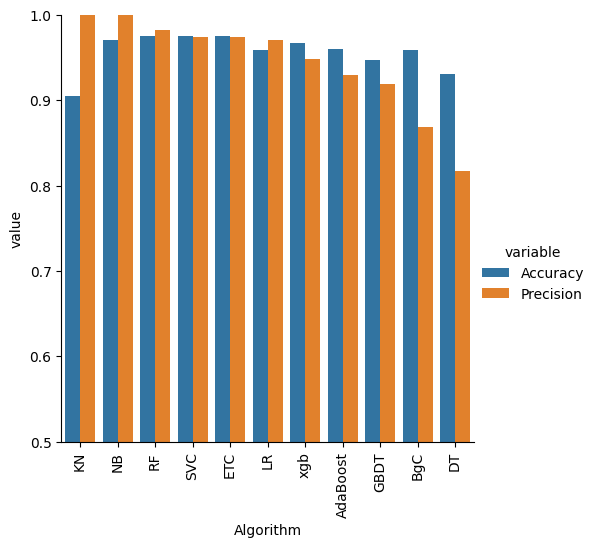

In [92]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [95]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [96]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [98]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


###  Voting Classifier (Soft Voting)

**Base Models**:
- `SVC` with sigmoid kernel
- `MultinomialNB`
- `ExtraTreesClassifier` (n_estimators=50)

**Voting Strategy**: `Soft Voting` (based on predicted probabilities)




In [99]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [101]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [104]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


**Performance on Test Set**:
- **Accuracy**: *0.9816247582205029*
- **Precision**: *0.9917355371900827*

This ensemble combines the strengths of different classifiers to improve generalization and performance.

###  Stacking Classifier

**Base Learners**:
- `SVC` with sigmoid kernel
- `MultinomialNB`
- `ExtraTreesClassifier` (n_estimators=50)

**Final Estimator**:
- `RandomForestClassifier`

**Performance on Test Set**:
- **Accuracy**: *<your_output_accuracy>*
- **Precision**: *<your_output_precision>*

Stacking leverages the predictive power of multiple base models by training a final estimator on their combined outputs, often leading to better overall performance.


In [105]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [106]:
from sklearn.ensemble import StackingClassifier

In [107]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [108]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


###  Saving Model and Vectorizer with Pickle


We are choosing mnb as our final model as this gives the best precision.

In [125]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))